In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from core_functions import *
from regu_functions import *

np.random.seed(1)

In [2]:
import h5py

# Import data from datafile 'datasets/train_catvnoncat.h5', which is from the Coursera DLS

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r") 
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

# simply normalizing

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # -1 flatten the structure(64, 64, 3) into (12288)
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

In [3]:
def L_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=100, print_cost=False):
    parameters = initialize_parameters_he(layer_dims) # update method of initilization with he_initilizer
    costs = []
    for i in range(num_iterations):
        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 500 == 0 or i == num_iterations-1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
        
    return parameters, costs

In [4]:
n = train_x.shape[0]
layer_dims = [n,20,7,5,1] 

parameters, costs = L_layer_model(train_x, train_set_y_orig, layer_dims, learning_rate=0.0005, num_iterations=2000, print_cost=True)

Cost after iteration 0: 1.2081250106003227
Cost after iteration 500: 0.6434081545669109
Cost after iteration 1000: 0.6386820153106367
Cost after iteration 1500: 0.5880136151937356
Cost after iteration 1999: 0.29765186197435


In [5]:
p_train = predict(train_x, train_set_y_orig, parameters)
p_test = predict(test_x, test_set_y_orig, parameters)

Accuracy:  0.9377990430622007
Accuracy:  0.72


In [6]:
# 经过测试发现，he_initialization在这个识别猫猫的model中的表现并不一定比random_initialization好...特别是在迭代次数低的情况下...

In [7]:
def L_layer_model_regularization(X, Y, layer_dims, lambd, learning_rate=0.0075, num_iterations=100, print_cost=False):
    parameters = initialize_parameters_he(layer_dims)
    costs = []
    for i in range(num_iterations):
        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost_with_regu_ltwo(AL, Y, parameters, lambd)    # updated the method of computing cost
        grads = backward_propagation_regu(AL, Y, caches, lambd)    # updated the method of backward propagation
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 500 == 0 or i == num_iterations-1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
        
    return parameters, costs

In [8]:
parameters, costs = L_layer_model_regularization(train_x, train_set_y_orig, layer_dims, 0.1, learning_rate=0.0005, num_iterations=2000, print_cost=True)

p_train = predict(train_x, train_set_y_orig, parameters)
p_test = predict(test_x, test_set_y_orig, parameters)

Cost after iteration 0: 0.783824615414506
Cost after iteration 500: 0.2366166237995997
Cost after iteration 1000: 0.03896076205324485
Cost after iteration 1500: 0.03222658294401109
Cost after iteration 1999: 0.030491134192427806
Accuracy:  0.9952153110047844
Accuracy:  0.78


In [9]:
def L_layer_model_regularization_do(X, Y, layer_dims, lambd, keep_prob = 0.5, learning_rate=0.0075, num_iterations=100, print_cost=False):
    parameters = initialize_parameters_he(layer_dims)
    costs = []
    for i in range(num_iterations):
        AL, caches = forward_propagation_do(X, parameters, keep_prob)
        cost = compute_cost_with_regu_ltwo(AL, Y, parameters, lambd)
        grads = backward_propagation_regu_do(AL, Y, caches, lambd, keep_prob)    # updated the method of backward propagation
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 500 == 0 or i == num_iterations-1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
        
    return parameters, costs

In [15]:
parameters, costs = L_layer_model_regularization_do(train_x, train_set_y_orig, layer_dims, 0.1, keep_prob = 1, learning_rate=0.0005, num_iterations=2000, print_cost=True)

p_train = predict(train_x, train_set_y_orig, parameters)
p_test = predict(test_x, test_set_y_orig, parameters)

Cost after iteration 0: 0.812352449391221
Cost after iteration 500: 0.2560953334731207
Cost after iteration 1000: 0.028938458378140956
Cost after iteration 1500: 0.021877885391998246
Cost after iteration 1999: 0.020982920923581182
Accuracy:  0.9999999999999998
Accuracy:  0.74


In [14]:
parameters, costs = L_layer_model_regularization_do(train_x, train_set_y_orig, layer_dims, 0.1, keep_prob = 0.86, learning_rate=0.0002, num_iterations=4000, print_cost=True)

p_train = predict(train_x, train_set_y_orig, parameters)
p_test = predict(test_x, test_set_y_orig, parameters)

Cost after iteration 0: 0.7322958218918726
Cost after iteration 500: 0.6477810529699125
Cost after iteration 1000: 0.6434716159419339
Cost after iteration 1500: 0.6434677037736986
Cost after iteration 2000: 0.6081680183544756
Cost after iteration 2500: 0.5750069753749953
Cost after iteration 3000: 0.6025910582002219
Cost after iteration 3500: 0.5972819344939228
Cost after iteration 3999: 0.5702758173386892
Accuracy:  0.8755980861244017
Accuracy:  0.6600000000000001


Accuracy:  0.0
y= 0.0, my model predict it as a 'non-cat' picture.


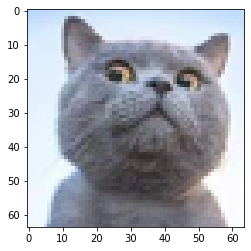

In [11]:
from PIL import Image
my_image = "mycattest.jpg"
my_label_y = [1]
num_px = 64

fname = my_image # if the image is in a folder, we need to add "folername/" infront the file name
image = np.array(Image.open(fname).resize((num_px, num_px))) #reshape the image to fit my propram
plt.imshow(image)

# process the raw data
image = image/255.
image = image.reshape((1,num_px*num_px*3)).T # our import data has the shape of(n,m), where n here particularly equals to 64*64*3 = 12288 
my_pred = predict(image, my_label_y, parameters)

print('y= ' + str(np.squeeze(my_pred)) + ', my model predict it as a \'' + classes[int(np.squeeze(my_pred))].decode('utf-8') + '\' picture.')

# 测试block
# 经过在基础的模型中添加he_initialization，regularization和dropout，模型的准确率从0.72-0.76-0.8，我的测试猫猫图像也能识别出来了。
